<a href="https://colab.research.google.com/github/pentakll4002/logisticRegression/blob/main/Logistic_Regression_Implement_(Imblance_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

In [2]:
# Generate an imbalanced dataset
X, y = make_classification(
    n_samples=10000, n_features=2, n_clusters_per_class=1,
    n_redundant=0, weights=[0.99], random_state=10
)

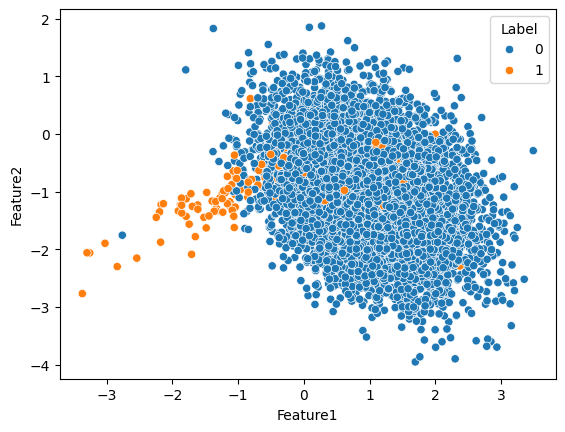

In [3]:
# Visualize the dataset
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Label"] = y
sns.scatterplot(x="Feature1", y="Feature2", hue="Label", data=df)
plt.show()

In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
# Define parameter grid
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['liblinear', 'saga']  # Valid solvers for L1 penalty
class_weight = [None, 'balanced']

In [6]:
params = {
    'penalty': penalty,
    'C': c_values,
    'solver': solver,
    'class_weight': class_weight
}

In [7]:
# Define and run GridSearchCV
cv = StratifiedKFold(n_splits=5)
model = LogisticRegression()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [8]:
# Evaluate the model
y_pred = grid.best_estimator_.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9876
Confusion Matrix:
 [[2462    0]
 [  31    7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2462
           1       1.00      0.18      0.31        38

    accuracy                           0.99      2500
   macro avg       0.99      0.59      0.65      2500
weighted avg       0.99      0.99      0.98      2500



In [11]:
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


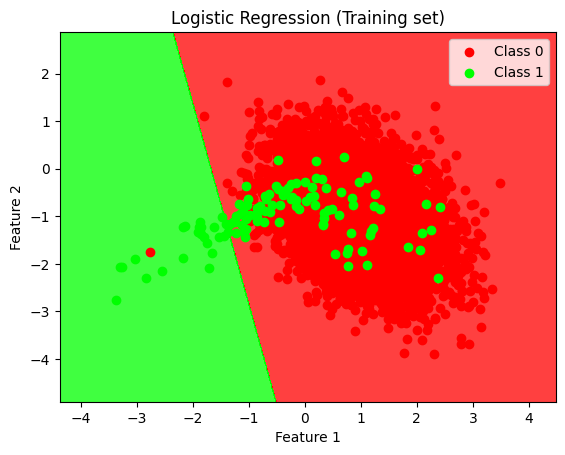

In [19]:
# Visualize the decision boundary
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

X_set, y_set = X_train, y_train

# Generate the grid for decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict the grid points
Z = grid.best_estimator_.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Define a valid colormap using hexadecimal color codes
cmap = ListedColormap(["#FF0000", "#00FF00"])  # Red and Green

# Plot the contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot of the training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=np.array(["#FF0000", "#00FF00"])[i], label=f"Class {j}"
    )

plt.title("Logistic Regression (Training set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
